In [167]:
# This file is a simple implementation of the 
from keras.models import Sequential
from keras.layers import LSTM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
model = Sequential()
eurusd_train = pd.read_csv(r"C:\Users\edgil\Documents\Masters\dissertation\code64\data_set\eurusd_train_normed.csv")
eurusd_test = pd.read_csv(r"C:\Users\edgil\Documents\Masters\dissertation\code64\data_set\eurusd_test_normed.csv")
eurusd_train = eurusd_train.replace(np.nan, 0)
eurusd_test = eurusd_test.replace(np.nan, 0)

In [41]:
from keras.models import Model # Dense
model.add(Dense(units=2, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
x_train = np.array([[1,1],[1,0],[0,1],[0,0]])
y_train = np.array([0,1,0,0])
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)

In [2]:
# set up the training data for the model
# we must normalise the inputs so they can pick up the correct values
data = [[[(i+j)/100]for i in range(0,5)] for j in range(0,200)]
target = [[(i+5)/100] for i in range(0,100)]
npData = np.array(data, dtype = float)
npTarget = np.array(target, dtype = float)
npData.shape
x_train, x_test, y_train, y_test = train_test_split(npData,npTarget,test_size = 0.2, random_state = 4)
# data stored as data[row_obversation][first_col_data][value_of_col]

In [183]:
# TODO Friday-> Tomorrow
# Get LSTM model working with your train,test data first
# get it learning and giving output. Then look to refine the model. think about the target, how will we create probability distributions? 
# get the EURUSD data
#npData.shape
# Data needs to be reshaped into 3D tensor
train_sample = eurusd_train.iloc[:500,:].values
test_sample = eurusd_test.iloc[:500,:].values
#sample_data['target'] = 1
#target.shape
# this creates your dataset with the lookback periods it needs to use.

import numpy as np
# this lookbacks over a set period as the memory for the LSTM
look_back = 30
def create_dataset(dataset, look_back=look_back):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back+1):
      # this takes the very last col as the target
    a = dataset[i:(i+look_back), :-1]
    dataX.append(a)
    # this code assumes that the target vector is the very last row.
    dataY.append(dataset[i + look_back - 1, -1])
  return np.array(dataX), np.array(dataY)

train_sample_transformed = create_dataset(train_sample,look_back)
train_data = train_sample_transformed[0]
train_target = train_sample_transformed[1]

test_sample_transformed = create_dataset(test_sample,look_back)
test_data = test_sample_transformed[0]
test_target = test_sample_transformed[1]

# reshape sems to add another list around every observation
train_data = train_data.reshape(train_data.shape[0], look_back, train_data.shape[2])
train_target = train_target.reshape(train_target.shape[0], 1)

test_data = train_data.reshape(test_data.shape[0], look_back, test_data.shape[2])
test_target = test_target.reshape(test_target.shape[0], 1)


In [184]:
train_target.shape
#test_target

(471, 1)

In [102]:
#rough work
"""
dataset = eurusd.iloc[:100,:].values
i = 0
look_back = 5
dataX, dataY = [], []
a = dataset[i:(i+look_back), :]
#dataX.append(a)
dataY.append(dataset[i + look_back - 1, -1])
dataY
"""

'\ndataset = eurusd.iloc[:100,:].values\ni = 0\nlook_back = 5\ndataX, dataY = [], []\na = dataset[i:(i+look_back), :]\n#dataX.append(a)\ndataY.append(dataset[i + look_back - 1, -1])\ndataY\n'

In [72]:
#sample_data = sample_data.reshape(sample_data.shape[0], sample_data.shape[1], sample_data.shape[3])
#sample_data[0]

NameError: name 'dataY' is not defined

In [185]:
# this code sets up the LSTM model.
'''
Original
model = Sequential()
model.add(LSTM((1),batch_input_shape = (None,5,1), return_sequences = True))
model.add(LSTM((1), return_sequences = False))
model.compile(loss = "mean_absolute_error", optimizer="adam", metrics = ['accuracy'])
model.summary()
'''
# need to try understand the input shapes and what is required of it.
# look at tutorials where they use this data
# Friday:GOAL have the LSTM working with your input (and variable data set)
# BONUS GOAL: simulate trendy and mean reverty data.
# batch_input_shape (no_obversations,timelookback, features)
no_features = train_data.shape[2]
model = Sequential()
model.add(LSTM(1,batch_input_shape = (None,look_back,no_features), return_sequences = True))
model.add(LSTM(1, return_sequences = False))
model.compile(loss = "mean_absolute_error", optimizer="adam", metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 30, 1)             152       
_________________________________________________________________
lstm_24 (LSTM)               (None, 1)                 12        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [186]:
# model training
'''
history = model.fit(x_train,y_train, epochs=100,validation_data=(x_test,y_test))
results = model.predict(x_test)
'''

history = model.fit(train_data,train_target, epochs=300,validation_data=(test_data,test_target), verbose=0 )

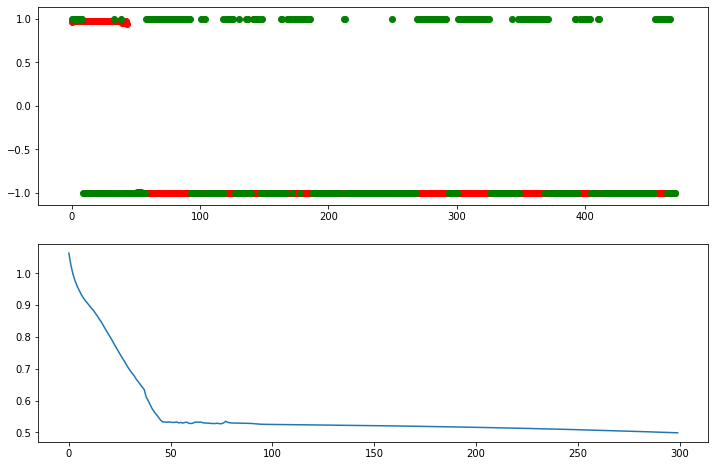

In [190]:
# plot results
import matplotlib.pyplot as plt
results = model.predict(test_data)
fig , ax = plt.subplots(2,1,figsize=(12,8))
ax[0].scatter(range(len(results)), results, c = "r")
ax[0].scatter(range(len(test_target)), test_target, c = "g")
# lets see the history of the error update.
ax[1].plot(history.history['loss'])
plt.show()

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predicted = [np.sign(i) for i in results]
true_class = [np.sign(i) for i in test_target]
print(accuracy_score(true_class, predicted))

print(pd.DataFrame(
    confusion_matrix(true_class, predicted),
    columns=['Predicted Buy','Predicted Sell'],
    index=['True Buy', 'True Sell']
))

0.5605095541401274
           Predicted Buy  Predicted Sell
True Buy             253              33
True Sell            174              11
